# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

      - Bandung House Price: https://www.kaggle.com/datasets/khaleeel347/harga-rumah-seluruh-kecamatan-di-kota-bandung


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
df = pd.read_csv('/content/bandung-house-price.csv')
df.head()

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area,building_area (m2)
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2100000000,137,170
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4100000000,202,300
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3300000000,350,258
3,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,580000000,30,80
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1300000000,176,176


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Deskripsi Umum Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7609 entries, 0 to 7608
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   house_name          7609 non-null   object
 1   location            7609 non-null   object
 2   bedroom_count       7609 non-null   int64 
 3   bathroom_count      7609 non-null   int64 
 4   carport_count       7609 non-null   int64 
 5   price               7609 non-null   int64 
 6   land_area           7609 non-null   int64 
 7   building_area (m2)  7609 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 475.7+ KB


In [ ]:
df.describe()

,bedroom_count,bathroom_count,carport_count,price,land_area,building_area (m2)
count,7609.000000,7609.000000,7609.000000,7.609000e+03,7609.000000,7.609000e+03
mean,4.476935,3.196478,1.374688,4.981947e+09,274.553949,6.424599e+02
std,4.712505,4.104819,1.928083,1.476257e+10,440.553799,3.445898e+04
min,0.000000,0.000000,0.000000,1.200000e+07,6.000000,-2.500000e+02
25%,3.000000,2.000000,0.000000,1.150000e+09,102.000000,1.000000e+02
50%,4.000000,3.000000,1.000000,2.250000e+09,165.000000,1.800000e+02
75%,5.000000,3.000000,2.000000,4.750000e+09,313.000000,3.000000e+02
max,99.000000,99.000000,40.000000,7.350000e+11,11850.000000,3.006000e+06


### Korelasi Antar Fitur

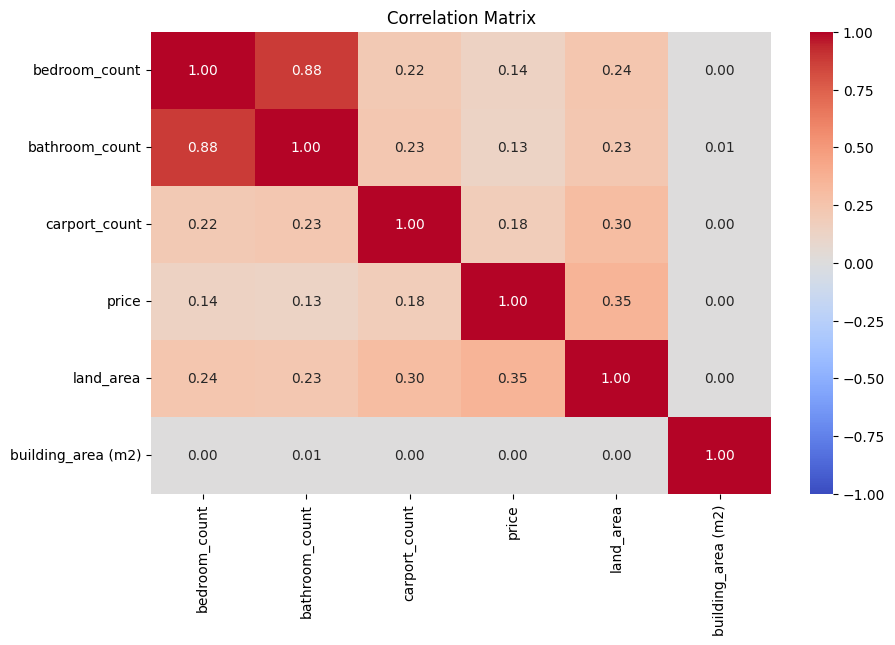

In [ ]:
# Memilih kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns

### MULAI CODE ###

# Hitung matriks korelasi
correlation = df[numerical_cols].corr()

# Buat visualisasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation,
               annot=True,
               cmap='coolwarm',
               fmt=".2f",
               vmin=-1,
               vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Sebaran Data Berdasarkan Masing-masing Fitur

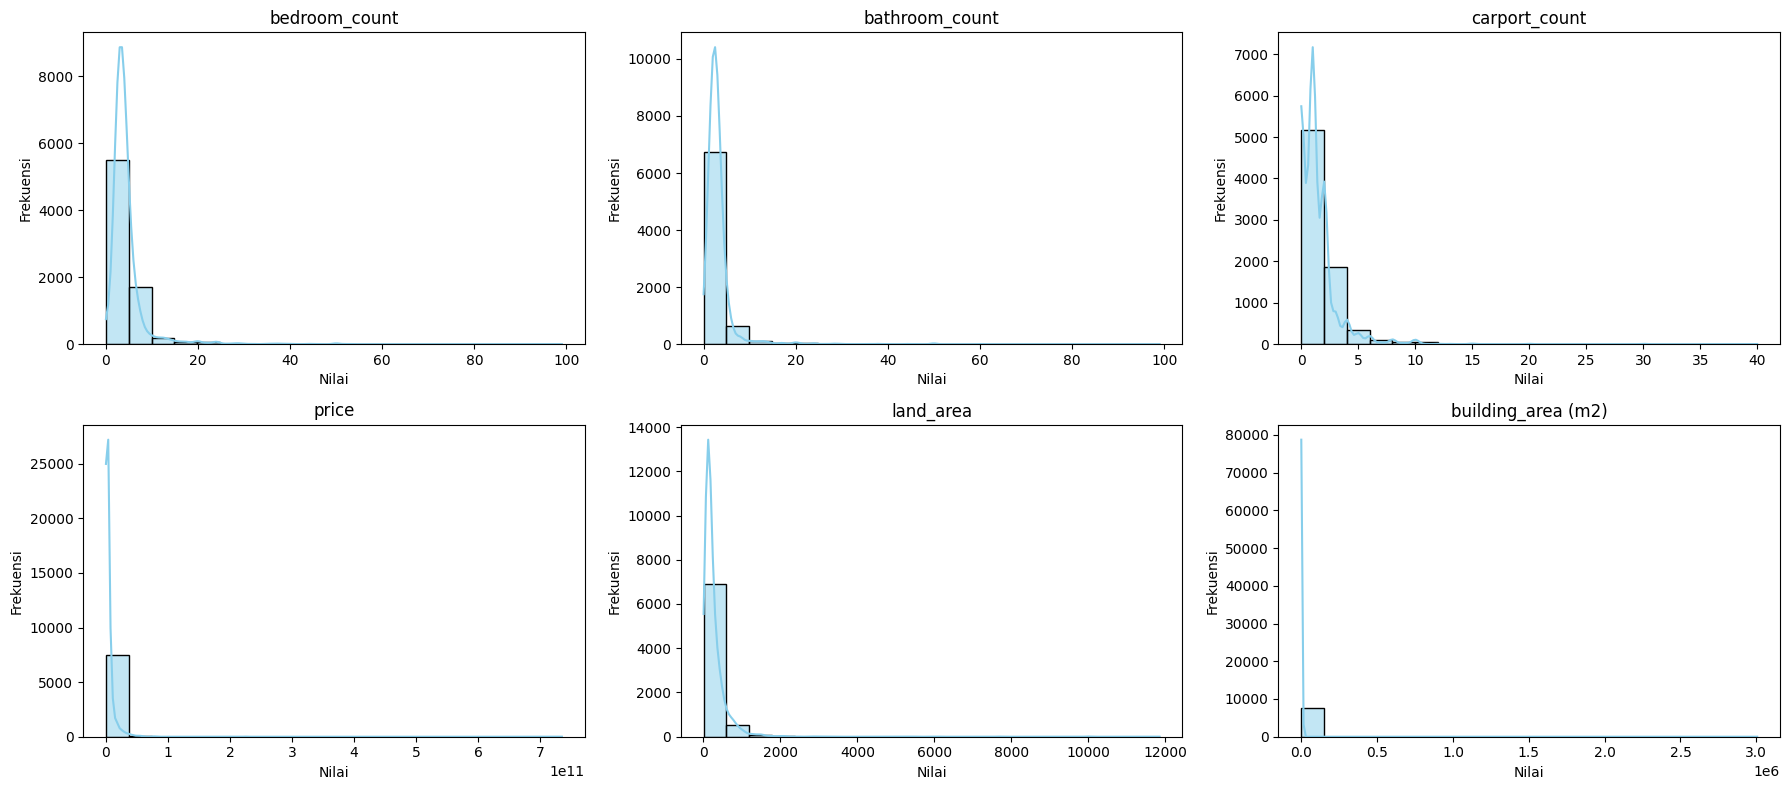

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, column in enumerate(numerical_cols):

    ### MULAI CODE ###

    # Tampilkan histogram dan pastikan plot ditempatkan di subplot (axes) yang benar
    sns.histplot(df[column], bins=20, kde=True, color='skyblue', ax=axes[i])
    # sns.histplot(df[column], bins=20, kde=True, color='skyblue')

    # Atur judul dan label
    axes[i].set_title(column)
    axes[i].set_xlabel("Nilai")
    axes[i].set_ylabel("Frekuensi")

    ### SELESAI CODE ###

plt.tight_layout()
plt.show()

### Sebaran Harga Rumah Berdasarkan Luas Bangunan

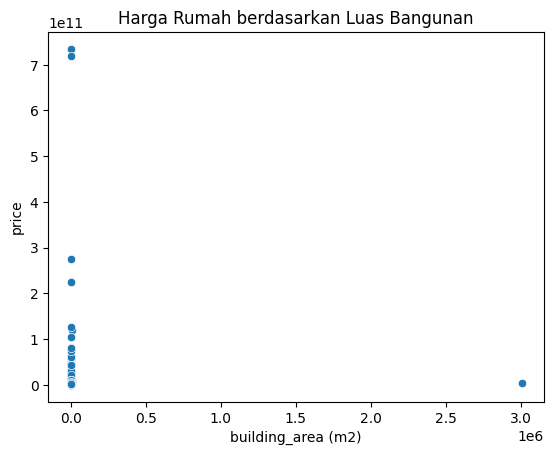

In [ ]:
sns.scatterplot(x="building_area (m2)", y="price", data=df)
plt.title("Harga Rumah berdasarkan Luas Bangunan")
plt.show()

### Sebaran Harga Rumah Berdasarkan Luas Area/Tanah

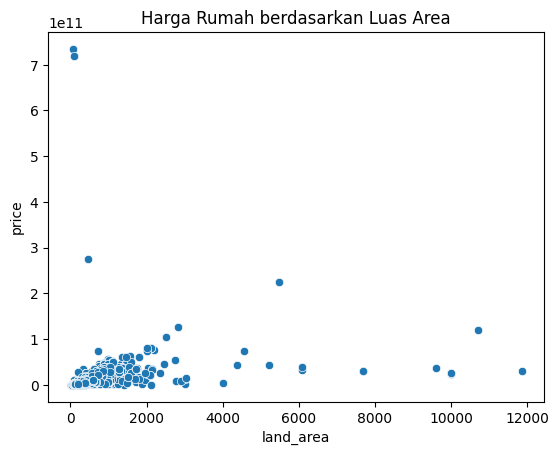

In [ ]:
sns.scatterplot(x="land_area", y="price", data=df)
plt.title("Harga Rumah berdasarkan Luas Area")
plt.show()

### Sebaran Harga Rumah Berdasarkan Lokasi

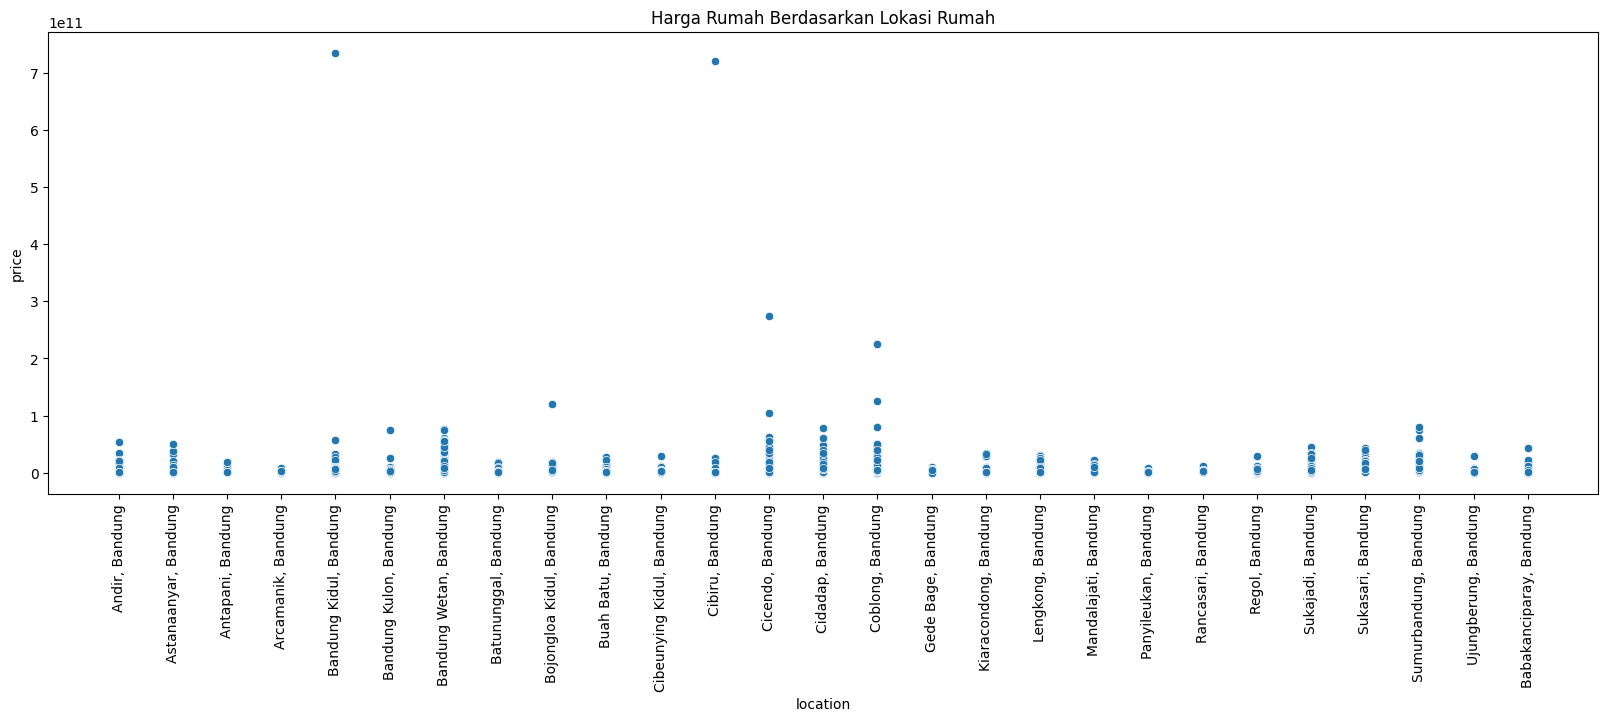

In [ ]:
plt.figure(figsize=(20, 6))

sns.scatterplot(x=df['location'], y=df['price'], data=df)

plt.title("Harga Rumah Berdasarkan Lokasi Rumah")
plt.xticks(rotation=90)

plt.show()

In [ ]:
df['district'] = df['location'].str.split(',').str[0].str.strip()

df.groupby('district')['price'].agg(
    count='count',
    mean='mean',
    median='median'
).sort_values('median', ascending=False)


,count,mean,median
district,,,
Bandung Wetan,323,1.740116e+10,1.200000e+10
Sumurbandung,247,1.386184e+10,1.200000e+10
Coblong,190,1.499218e+10,6.500000e+09
Cidadap,311,8.045238e+09,6.000000e+09
Sukajadi,190,6.982842e+09,4.775000e+09
Sukasari,209,6.069000e+09,4.500000e+09
Lengkong,342,5.509848e+09,3.800000e+09
Cicendo,379,8.591137e+09,3.700000e+09
Batununggal,323,4.589783e+09,3.650000e+09


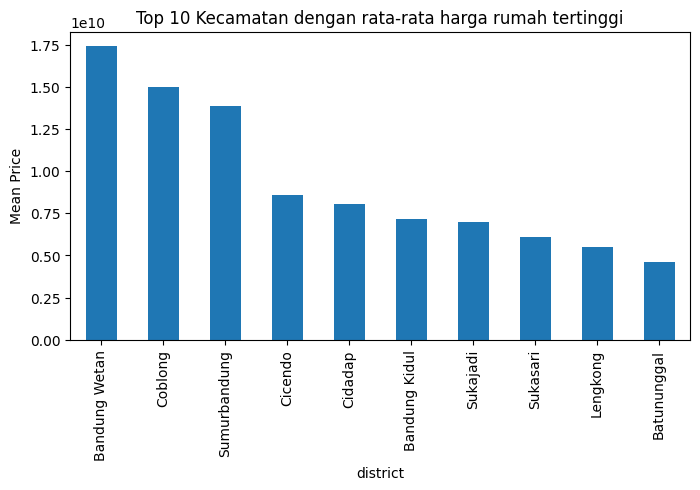

In [ ]:
top_district = (
    df.groupby('district')['price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_district.plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Kecamatan dengan rata-rata harga rumah tertinggi")
plt.ylabel("Mean Price")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### Missing Values

In [ ]:
df.isnull().sum()

,0
house_name,0
location,0
bedroom_count,0
bathroom_count,0
carport_count,0
price,0
land_area,0
building_area (m2),0
district,0


In [ ]:
df.isna().sum()

,0
house_name,0
location,0
bedroom_count,0
bathroom_count,0
carport_count,0
price,0
land_area,0
building_area (m2),0
district,0


### Duplicated Data

In [ ]:
df.duplicated().sum()

np.int64(617)

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### Penanganan Fitur Tidak Relevan

In [ ]:
df = df.drop(columns=['building_area (m2)', 'house_name', 'location'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6992 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bedroom_count   6992 non-null   int64 
 1   bathroom_count  6992 non-null   int64 
 2   carport_count   6992 non-null   int64 
 3   price           6992 non-null   int64 
 4   land_area       6992 non-null   int64 
 5   district        6992 non-null   object
dtypes: int64(5), object(1)
memory usage: 382.4+ KB


### Pembagian Dataset

In [ ]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Penanganan Outlier dengan Metode Quantile Capping

In [ ]:
FITUR_COLUMNS = [
    'land_area',
    'bedroom_count',
    'bathroom_count',
    'carport_count'
]

Q_LOW = 0.01
Q_HIGH = 0.99

quantile_bounds = {}

for col in FITUR_COLUMNS :
    q_low = X_train[col].quantile(Q_LOW)
    q_high = X_train[col].quantile(Q_HIGH)
    quantile_bounds[col] = (q_low, q_high)

    X_train[col] = X_train[col].clip(q_low, q_high)
    X_test[col] = X_test[col].clip(q_low, q_high)


### Log Transform untuk Fitur Target

In [ ]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

### Encoding Data Kategorikal

In [ ]:
# global mean (train only)
global_mean = y_train.mean()

# category mean (train only)
district_mean = (
    X_train
    .assign(log_price=y_train)
    .groupby('district')['log_price']
    .mean()
)

# encode train
X_train['district_te'] = X_train['district'].map(district_mean)

# encode test (SAMA mapping-nya)
X_test['district_te'] = X_test['district'].map(district_mean)

# handle unseen category (test only, aman juga untuk train)
X_train['district_te'] = X_train['district_te'].fillna(global_mean)
X_test['district_te'] = X_test['district_te'].fillna(global_mean)


In [ ]:
X_train = X_train.drop(columns=['district'])
X_test = X_test.drop(columns=['district'])

### Standarisasi Fitur

In [ ]:
scaler = StandardScaler()

X_train[FITUR_COLUMNS] = scaler.fit_transform(X_train[FITUR_COLUMNS])
X_test[FITUR_COLUMNS] = scaler.transform(X_test[FITUR_COLUMNS])


### Save Data Preprocessing

In [ ]:
X_train.to_csv('X_train_processed.csv')
y_train.to_csv('y_train_processed.csv')
X_test.to_csv('X_test_processed.csv')
y_test.to_csv('y_test_processed.csv')